In [1]:
##Import required library
from scipy import signal
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_sample,fs=map(int,input().split())                   ##Let Number of samples in the signal 2048,let Sampling frequency=4000Hz

2048 4000


In [3]:
dt = 1/fs                        ##Inter sample time =1/fs 0.0001s 
t = np.arange(0, N_sample)*dt    ##Time vector

In [4]:
## Create signal vector that is the sum of 50 Hz, 1023 Hz, and 1735 Hz
Signal =np.sin(2*np.pi*50*t) +np.sin(2*np.pi*1023*t)+np.sin(2*np.pi*1735*t)

In [5]:
##Add some random noise to the signal
Signal =Signal+np.random.normal(0, .1, Signal.shape)

In [6]:
##Let requied Specification for the filter  ####Take the values like this......
fstop_L= 500 #Lower stopband frequency in Hz
fpass_L= 800 #Lower passband frequency in HZ
fpass_U=1200  #Upper passband frequency in HZ
fstop_U= 1500  #Upper stopband frequency in Hz
gpass=0.5  #Pass band gain in dB
gstop=50 #Stop band attenuation in dB

In [7]:
##Compute normalized passband and stopband frequencies with respect to Nyquist rate
wp=np.array([fpass_L,fpass_U])/(fs/2)      ##normalized Pass band edge frequencies w.r.t Nyquist rate
ws=np.array([fstop_L,fstop_U])/(fs/2)     ##normalized stop band edge frequencies w.r.t Nyquist rate

In [8]:
#Design the filter using signal.iirdesign and output='sos'
sos =signal.iirdesign(wp,ws,gpass,gstop,ftype='ellip',output='sos')

In [9]:
##Determine Frequency response of the filter using signal.sosfreqz
w,h =signal.sosfreqz(sos,worN=1500) ##normalized Pass band edge frequencies w.r.t Nyquist rate    


In [11]:
##Calculate Magnitude in dB
h_dB = 20 * np.log10(abs(h))      #Calculate magnitude in decibels 


In [12]:
#Filter the noisy signal using  designed filter. Use signal.sosfiltfilt()
filtOut=signal.sosfiltfilt(sos,Signal)

Text(0.5, 1.0, 'Noisy signal')

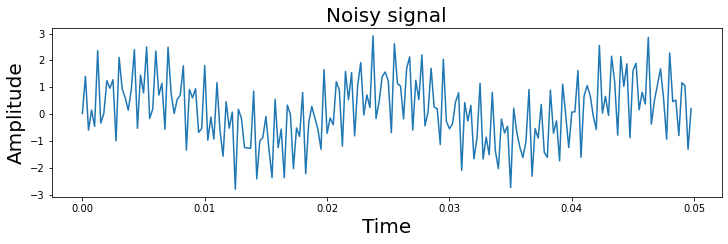

In [14]:
##Plot filter magnitude and phase responses using subplot. Digital frequency w converted in analog frequency
fig = plt.figure(figsize=(12, 18))

##Original signal
sub1 = plt.subplot(5, 1, 1)
sub1.plot(t[0:200],Signal[0:200])
sub1.set_ylabel('Amplitude', fontsize=20)
sub1.set_xlabel('Time', fontsize=20)
sub1.set_title('Noisy signal', fontsize=20)


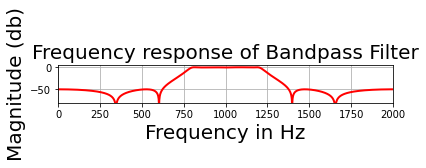

In [16]:
##Magnitude response Plot
sub2 = plt.subplot(5, 1, 2)
sub2.plot(w*fs/(2*np.pi),h_dB,'r', label='Bandpass filter', linewidth='2')           #Plot magnitude response wiof the designed filter 
sub2.set_ylabel('Magnitude (db)', fontsize=20)
sub2.set_xlabel('Frequency in Hz', fontsize=20)
sub2.set_title('Frequency response of Bandpass Filter', fontsize=20)
sub2.axis([0,  fs/2,  -80,  5])
sub2.grid()



Text(0.5, 1.0, 'Filtered output of Band pass Filter')

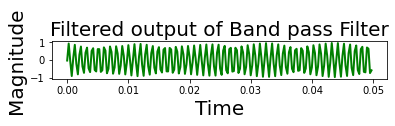

In [17]:
sub3 = plt.subplot(5, 1, 3)
sub3.plot(t[0:200], filtOut[0:200],'g', label='Filtered signal', linewidth='2')      #Plot output of filtered signal 
sub3.set_ylabel('Magnitude', fontsize=20)
sub3.set_xlabel('Time', fontsize=20)
sub3.set_title('Filtered output of Band pass Filter', fontsize=20)


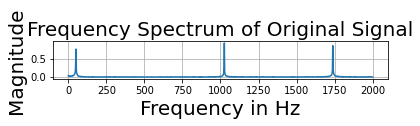

In [18]:
#Show spectrum of noisy input signal
Sigf =fft(Signal) ### START CODE HERE ### (≈ 1 line of code)             ##Compute FFT of the input noisy signal


sub4 = plt.subplot(5, 1, 4)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub4.plot(xf, 2.0/N_sample * np.abs(Sigf[0:(N_sample-1)//2]))
sub4.set_ylabel('Magnitude', fontsize=20)
sub4.set_xlabel('Frequency in Hz', fontsize=20)
sub4.set_title('Frequency Spectrum of Original Signal', fontsize=20)
sub4.grid()


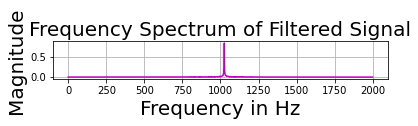

In [19]:
Outf =fft(filtOut)### START CODE HERE ### (≈ 1 line of code)           ##Compute FFT of the filtered signal


sub5 = plt.subplot(5, 1, 5)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub5.plot(xf, 2.0/N_sample * np.abs(Outf[0:(N_sample-1)//2]), 'm')
sub5.set_ylabel('Magnitude', fontsize=20)
sub5.set_xlabel('Frequency in Hz', fontsize=20)
sub5.set_title('Frequency Spectrum of Filtered Signal', fontsize=20)
sub5.grid()

fig.tight_layout()
plt.show()